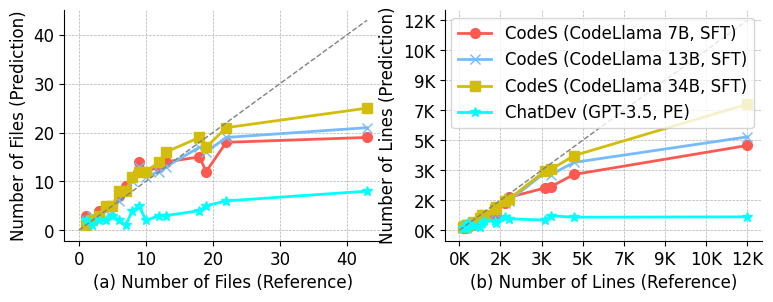

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 18, 19, 22, 43]


dscoder_values = [3, 2, 4, 5, 5, 7, 9, 11, 14, 12, 13, 14, 15, 12, 18, 19]
dscoder_values_x = np.array(x)[~np.isnan(dscoder_values)]
dscoder_values_y = np.array(dscoder_values)[~np.isnan(dscoder_values)]
axs[0].plot(
    dscoder_values_x, 
    dscoder_values_y, 
    color='xkcd:coral', # ['xkcd:sky blue', 'xkcd:light green', 'xkcd:coral', 'xkcd:light cyan', 'xkcd:lavender', 'xkcd:light yellow', 'xkcd:silver', 'xkcd:light grey']
    linewidth=2, 
    label='CodeS (CodeLlama 7B)', 
    marker='o',
    markersize=7,
    linestyle='-' # ['-', '--', '-.', ':', '', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']
)

starcoder2_values = [2, 3, 3, 4, 4, 6, 8, 10, 13, 11, 12, 13, 17, 16, 19, 21]
starcoder2_values_x = np.array(x)[~np.isnan(starcoder2_values)]
starcoder2_values_y = np.array(starcoder2_values)[~np.isnan(starcoder2_values)]
axs[0].plot(
    starcoder2_values_x,
    starcoder2_values_y,
    color='xkcd:sky blue', # ['xkcd:sky blue', 'xkcd:light green', 'xkcd:coral', 'xkcd:light cyan', 'xkcd:lavender', 'xkcd:light yellow', 'xkcd:silver', 'xkcd:light grey']
    linewidth=2, 
    label='CodeS (CodeLlama 13B)', 
    marker='x', 
    markersize=7,
    linestyle='-' # ['-', '--', '-.', ':', '', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']
)

codellama_values = [1, 2, 3, 5, 5, 8, 8, 11, 12, 12, 14, 16, 19, 17, 21, 25]
codellama_values_x = np.array(x)[~np.isnan(codellama_values)]
codellama_values_y = np.array(codellama_values)[~np.isnan(codellama_values)]
axs[0].plot(
    codellama_values_x, 
    codellama_values_y, 
    color='xkcd:mustard yellow', # ['xkcd:sky blue', 'xkcd:light green', 'xkcd:coral', 'xkcd:light cyan', 'xkcd:lavender', 'xkcd:light yellow', 'xkcd:silver', 'xkcd:light grey']
    linewidth=2, 
    label='CodeS (CodeLlama 34B)', 
    marker='s', # ["o", "v", "^", "<", ">", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]
    markersize=7,
    linestyle='-' # ['-', '--', '-.', ':', '', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']
)

chatdev_values =   [2, 1, 2, 2, 3, 2, 1, 4, 5, 2, 3, 3, 4, 5, 6, 8]
chatdev_values_x = np.array(x)[~np.isnan(chatdev_values)]
chatdev_values_y = np.array(chatdev_values)[~np.isnan(chatdev_values)]
axs[0].plot(
    chatdev_values_x, 
    chatdev_values_y, 
    color='xkcd:cyan', # ['xkcd:sky blue', 'xkcd:light green', 'xkcd:coral', 'xkcd:light cyan', 'xkcd:lavender', 'xkcd:light yellow', 'xkcd:silver', 'xkcd:light grey']
    linewidth=2, 
    label='ChatDev (GPT-3.5)', 
    marker='*', # ["o", "v", "^", "<", ">", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]
    markersize=7,
    linestyle='-' # ['-', '--', '-.', ':', '', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']
)

font_size = 12
font_size_legend = 12

axs[0].set_ylabel('Number of Files (Prediction)', fontsize=font_size)
axs[0].set_xlabel('(a) Number of Files (Reference)', fontsize=font_size)
axs[0].xaxis.set_tick_params(labelsize=font_size)
axs[0].yaxis.set_tick_params(labelsize=font_size)

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_color('black')
axs[0].spines['left'].set_color('black')
axs[0].xaxis.set_ticks_position('bottom')
axs[0].yaxis.set_ticks_position('left')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
# axs[0].legend(prop={'size': font_size_legend})

# 对于第一个子图（axs[0]），添加参考线
max_value_0 = max(max(dscoder_values_x), max(dscoder_values_y), max(starcoder2_values_x), max(starcoder2_values_y), max(codellama_values_x), max(codellama_values_y), max(chatdev_values_x), max(chatdev_values_y))
axs[0].plot([0, max_value_0], [0, max_value_0], color='grey', linestyle='--', linewidth=1)



# ---

noise_rate = [164, 237, 274, 277, 315, 319, 367, 570, 873, 958, 1030, 1497, 1564, 1945, 2106, 3639, 3882, 4870, 12220]
# 将数据转换为以千为单位
noise_rate_k = np.array(noise_rate) / 1000

dscoder_values = [141, 145, 125, 191, 214, 235, 294, 324, 421, 631, 683, 813, 951, 1613, 1913, 2461, 2536, 3245, 4934]
dscoder_values_y_k = np.array(dscoder_values) / 1000
dscoder_values_x = np.array(noise_rate)[~np.isnan(dscoder_values_y_k)]
dscoder_values_y = np.array(dscoder_values_y_k)[~np.isnan(dscoder_values_y_k)]

axs[1].plot(
    noise_rate_k, 
    dscoder_values_y, 
    color='xkcd:coral', # ['xkcd:sky blue', 'xkcd:light green', 'xkcd:coral', 'xkcd:light cyan', 'xkcd:lavender', 'xkcd:light yellow', 'xkcd:silver', 'xkcd:light grey']
    linewidth=2, 
    label='CodeS (CodeLlama 7B, SFT)', 
    marker='o',
    markersize=7,
    linestyle='-' # ['-', '--', '-.', ':', '', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']
)
#                   [164, 237, 274, 277, 315, 319, 367, 570, 873, 958, 1030, 1497, 1564, 1945, 2106, 3639, 3882, 4870, 12220]
starcoder2_values = [152, 163, 113, 203, 231, 220, 310, 354, 521, 691, 783, 1013, 1251, 1613, 1713, 3361, 3236, 3945, 5434]
starcoder2_values = np.array(starcoder2_values) / 1000
starcoder2_values_x = np.array(noise_rate)[~np.isnan(starcoder2_values)]
starcoder2_values_y = np.array(starcoder2_values)[~np.isnan(starcoder2_values)]
axs[1].plot(
    noise_rate_k,
    starcoder2_values_y,
    color='xkcd:sky blue', # ['xkcd:sky blue', 'xkcd:light green', 'xkcd:coral', 'xkcd:light cyan', 'xkcd:lavender', 'xkcd:light yellow', 'xkcd:silver', 'xkcd:light grey']
    linewidth=2, 
    label='CodeS (CodeLlama 13B, SFT)', 
    marker='x', 
    markersize=7,
    linestyle='-' # ['-', '--', '-.', ':', '', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']
)

#                  [164, 237, 274, 277, 315, 319, 367, 570, 873, 958, 1030, 1497, 1564, 1945, 2106, 3639, 3882, 4870, 12220]
codellama_values = [159, 223, 253, 253, 301, 302, 330, 484, 721, 891, 883, 1213, 1351, 1713, 1813, 3461, 3536, 4345, 7334]
codellama_values = np.array(codellama_values) / 1000
codellama_values_x = np.array(noise_rate)[~np.isnan(codellama_values)]
codellama_values_y = np.array(codellama_values)[~np.isnan(codellama_values)]
axs[1].plot(
    noise_rate_k, 
    codellama_values_y, 
    color='xkcd:mustard yellow', # ['xkcd:sky blue', 'xkcd:light green', 'xkcd:coral', 'xkcd:light cyan', 'xkcd:lavender', 'xkcd:light yellow', 'xkcd:silver', 'xkcd:light grey']
    linewidth=2, 
    label='CodeS (CodeLlama 34B, SFT)', 
    marker='s', # ["o", "v", "^", "<", ">", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]
    markersize=7,
    linestyle='-' # ['-', '--', '-.', ':', '', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']
)

chatdev_values = [124, 142, 153, 216, 316, 381, 409, 223, 164, 423, 531, 536, 442, 771, 665, 588, 842, 757, 779]
chatdev_values = np.array(chatdev_values) / 1000
chatdev_values_x = np.array(noise_rate)[~np.isnan(chatdev_values)]
chatdev_values_y = np.array(chatdev_values)[~np.isnan(chatdev_values)]
axs[1].plot(
    noise_rate_k, 
    chatdev_values_y, 
    color='xkcd:cyan', # ['xkcd:sky blue', 'xkcd:light green', 'xkcd:coral', 'xkcd:light cyan', 'xkcd:lavender', 'xkcd:light yellow', 'xkcd:silver', 'xkcd:light grey']
    linewidth=2, 
    label='ChatDev (GPT-3.5, PE)', 
    marker='*', # ["o", "v", "^", "<", ">", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]
    markersize=7,
    linestyle='-' # ['-', '--', '-.', ':', '', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']
)

axs[1].set_ylabel('Number of Lines (Prediction)', fontsize=font_size)
axs[1].set_xlabel('(b) Number of Lines (Reference)', fontsize=font_size)
axs[1].xaxis.set_tick_params(labelsize=font_size)
axs[1].yaxis.set_tick_params(labelsize=font_size)
start = 0 
end = max(noise_rate_k)  # 根据数据的最大值确定结束值
step = (end - start) / 7  # 假设我们想要在X轴上有5个刻度（包括起点和终点）
axs[1].set_xticks(np.arange(start, end + step, step))
# axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_xticklabels(['{:.0f}K'.format(x) for x in axs[1].get_xticks()])
# axs[1].set_yticks(axs[1].get_yticks())
axs[1].set_yticks(np.arange(start, end + step, step))
axs[1].set_yticklabels(['{:.0f}K'.format(x) for x in axs[1].get_yticks()])

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_color('black')
axs[1].spines['left'].set_color('black')
axs[1].xaxis.set_ticks_position('bottom')
axs[1].yaxis.set_ticks_position('left')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].legend(prop={'size': font_size_legend})

# 对于第二个子图（axs[1]），添加参考线
max_value_1 = max(noise_rate_k)  # 因为第二个子图的横纵坐标都是基于noise_rate_k的值来设置的
axs[1].plot([0, max_value_1], [0, max_value_1], color='grey', linestyle='--', linewidth=1)


plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('./gt_files_lines_vs_generated_one.pdf', bbox_inches='tight', pad_inches=0.05, format='pdf', dpi=600)